<a href="https://colab.research.google.com/github/nicoelbert/AIS-Script/blob/master/aoe2net_aoe2insights_joint_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd

In [15]:
from google.colab import drive
drive.mount('/content/drive')

matches_df = pd.read_csv('drive/MyDrive/Uni/Lehrstuhl/aoe_data/joint_matches_df.csv')
matches_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,match_id,recordfile,avg_rating,map_size,game_duration,p1_civ,p2_civ,p1_strategy,p2_strategy,p1_feudal_time,p1_castle_time,p1_imperial_time,p2_feudal_time,p2_castle_time,p2_imperial_time,p1_builds,p1_que_units,p2_builds,p2_que_units,p1_tc_x_pos,p1_tc_y_pos,p2_tc_x_pos,p2_tc_y_pos,p1_Stone_close_forward,p1_Stone_far_forward,p1_Stone_backward,p1_Gold_close_forward,p1_Gold_far_forward,p1_Gold_backward,p1_Food_close_forward,p1_Food_far_forward,p1_Food_backward,p1_Relic_close_forward,p1_Relic_far_forward,p1_Relic_backward,p2_Stone_close_forward,p2_Stone_far_forward,p2_Stone_backward,p2_Gold_close_forward,p2_Gold_far_forward,p2_Gold_backward,p2_Food_close_forward,p2_Food_far_forward,p2_Food_backward,p2_Relic_close_forward,p2_Relic_far_forward,p2_Relic_backward,winner,winner_name,loser_name,recordfiledata
0,125537954,AgeIIDE_Replay_125537954.aoe2record,855.0,120,3058003,Italians,unkown,scout_rush,NaN,683070.0,1407556.0,2322893.0,720758.0,1176956.0,2412127.0,0,0,0,0,56,10,27,95,5,4,6,4,27,3,19,7,2,0,2,1,0,0,15,0,18,7,11,2,9,0,2,0,2,XRai,Massimi25,"{0: {'timestamp': '0:00:00.104000', 'type': 'F..."
1,125512678,AgeIIDE_Replay_125512678.aoe2record,NaN,120,2465768,Turks,Ethiopians,NaN,archer_rush,813327.0,1875428.0,NaN,676876.0,1663020.0,NaN,0,0,0,0,15,60,100,65,5,4,2,7,0,11,16,2,3,0,2,1,4,0,7,3,1,14,18,1,2,0,1,1,2,Razzno1,Azrail,"{0: {'timestamp': '0:00:00.104000', 'type': 'F..."
2,125508148,AgeIIDE_Replay_125508148.aoe2record,1144.5,120,683447,Ethiopians,Magyars,drush,NaN,612075.0,NaN,NaN,644611.0,NaN,NaN,0,0,0,0,58,97,41,21,5,4,3,3,5,10,1,2,16,0,1,2,0,3,9,0,8,10,6,5,7,0,0,2,1,Big Tuna,Manbearpig,"{0: {'timestamp': '0:00:00.104000', 'type': 'F..."
3,125508135,AgeIIDE_Replay_125508135.aoe2record,1042.5,120,1721599,Franks,Goths,scout_rush,drush,649810.0,1509207.0,NaN,634102.0,1454566.0,NaN,0,0,0,0,99,44,36,94,5,6,0,7,3,8,5,4,7,0,0,2,4,0,7,0,7,11,0,1,15,0,1,2,1,BeechyUK,BenGeL,"{0: {'timestamp': '0:00:00.104000', 'type': 'F..."
4,125504542,AgeIIDE_Replay_125504542.aoe2record,1415.0,120,3711710,Cumans,Lithuanians,scout_rush,drush,556842.0,1629719.0,2876934.0,556646.0,1424619.0,3059159.0,0,0,0,0,19,37,90,84,2,4,5,0,11,7,10,1,7,0,2,0,4,0,7,7,3,8,1,2,15,0,2,1,1,Smickel,Milka00013,"{0: {'timestamp': '0:00:00.104000', 'type': 'F..."


In [16]:
matches_df.describe()

,match_id,avg_rating,map_size,game_duration,p1_feudal_time,p1_castle_time,p1_imperial_time,p2_feudal_time,p2_castle_time,p2_imperial_time,p1_builds,p1_que_units,p2_builds,p2_que_units,p1_tc_x_pos,p1_tc_y_pos,p2_tc_x_pos,p2_tc_y_pos,p1_Stone_close_forward,p1_Stone_far_forward,p1_Stone_backward,p1_Gold_close_forward,p1_Gold_far_forward,p1_Gold_backward,p1_Food_close_forward,p1_Food_far_forward,p1_Food_backward,p1_Relic_close_forward,p1_Relic_far_forward,p1_Relic_backward,p2_Stone_close_forward,p2_Stone_far_forward,p2_Stone_backward,p2_Gold_close_forward,p2_Gold_far_forward,p2_Gold_backward,p2_Food_close_forward,p2_Food_far_forward,p2_Food_backward,p2_Relic_close_forward,p2_Relic_far_forward,p2_Relic_backward,winner
count,1.299000e+03,1287.000000,1299.0,1.299000e+03,1.296000e+03,1.273000e+03,5.850000e+02,1.297000e+03,1.272000e+03,5.780000e+02,1299.0,1299.0,1299.0,1299.0,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,1.185873e+08,1197.080031,120.0,2.438508e+06,6.411892e+05,1.186728e+06,2.412102e+06,6.402354e+05,1.169186e+06,2.400837e+06,0.0,0.0,0.0,0.0,57.317167,57.486528,56.536567,56.625096,2.371055,3.199384,5.830639,3.264049,6.515012,9.083141,5.014627,4.826790,10.083141,0.003849,1.232487,1.274827,2.430331,3.222479,5.873749,3.364126,6.525789,8.830639,4.961509,5.025404,9.955350,0.009238,1.121632,1.312548,1.535797
std,5.180361e+06,312.679962,0.0,9.693898e+05,1.313320e+05,4.741278e+05,3.721528e+05,1.275344e+05,4.735668e+05,3.544073e+05,0.0,0.0,0.0,0.0,29.221239,28.540250,28.675124,29.042480,2.546812,2.844636,3.327147,3.478797,5.797192,4.435727,3.876435,5.519124,8.042310,0.061946,0.971786,0.861292,2.506147,3.070650,3.272109,3.455503,5.858230,4.528181,3.820317,5.852591,8.408916,0.103443,0.883325,0.866739,0.498909
min,1.083439e+08,129.500000,120.0,4.994000e+03,0.000000e+00,0.000000e+00,1.248512e+06,0.000000e+00,0.000000e+00,1.232401e+06,0.0,0.0,0.0,0.0,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.146390e+08,982.250000,120.0,1.775724e+06,5.966410e+05,1.139614e+06,2.182371e+06,5.963180e+05,1.128035e+06,2.199375e+06,0.0,0.0,0.0,0.0,28.000000,29.000000,29.000000,27.000000,0.000000,0.000000,4.000000,0.000000,4.000000,6.000000,2.000000,2.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,4.000000,5.000000,2.000000,2.000000,5.000000,0.000000,0.000000,1.000000,1.000000
50%,1.194469e+08,1141.500000,120.0,2.394938e+06,6.344140e+05,1.316042e+06,2.381108e+06,6.334440e+05,1.303892e+06,2.385736e+06,0.0,0.0,0.0,0.0,58.000000,59.000000,55.000000,56.000000,1.000000,3.000000,6.000000,2.000000,7.000000,10.000000,4.000000,4.000000,9.000000,0.000000,1.000000,1.000000,2.000000,3.000000,6.000000,3.000000,7.000000,9.000000,4.000000,4.000000,9.000000,0.000000,1.000000,1.000000,2.000000
75%,1.232323e+08,1378.500000,120.0,3.006403e+06,6.996142e+05,1.435358e+06,2.602462e+06,6.931510e+05,1.420940e+06,2.603148e+06,0.0,0.0,0.0,0.0,87.000000,84.000000,85.000000,84.000000,5.000000,5.000000,8.000000,7.000000,8.000000,11.000000,7.000000,6.000000,12.000000,0.000000,2.000000,2.000000,5.000000,5.000000,7.000000,7.000000,8.000000,11.000000,7.000000,6.000000,12.000000,0.000000,2.000000,2.000000,2.000000
max,1.255380e+08,2478.000000,120.0,6.574167e+06,1.117451e+06,2.748516e+06,4.739746e+06,1.039704e+06,2.620609e+06,3.965031e+06,0.0,0.0,0.0,0.0,109.000000,105.000000,105.000000,109.000000,9.000000,22.000000,23.000000,15.000000,58.000000,27.000000,25.000000,51.000000,64.000000,1.000000,4.000000,4.000000,9.000000,24.000000,21.000000,1

In [17]:
matches_df.columns

Index(['match_id', 'recordfile', 'avg_rating', 'map_size', 'game_duration',
       'p1_civ', 'p2_civ', 'p1_strategy', 'p2_strategy', 'p1_feudal_time',
       'p1_castle_time', 'p1_imperial_time', 'p2_feudal_time',
       'p2_castle_time', 'p2_imperial_time', 'p1_builds', 'p1_que_units',
       'p2_builds', 'p2_que_units', 'p1_tc_x_pos', 'p1_tc_y_pos',
       'p2_tc_x_pos', 'p2_tc_y_pos', 'p1_Stone_close_forward',
       'p1_Stone_far_forward', 'p1_Stone_backward', 'p1_Gold_close_forward',
       'p1_Gold_far_forward', 'p1_Gold_backward', 'p1_Food_close_forward',
       'p1_Food_far_forward', 'p1_Food_backward', 'p1_Relic_close_forward',
       'p1_Relic_far_forward', 'p1_Relic_backward', 'p2_Stone_close_forward',
       'p2_Stone_far_forward', 'p2_Stone_backward', 'p2_Gold_close_forward',
       'p2_Gold_far_forward', 'p2_Gold_backward', 'p2_Food_close_forward',
       'p2_Food_far_forward', 'p2_Food_backward', 'p2_Relic_close_forward',
       'p2_Relic_far_forward', 'p2_Relic_backward

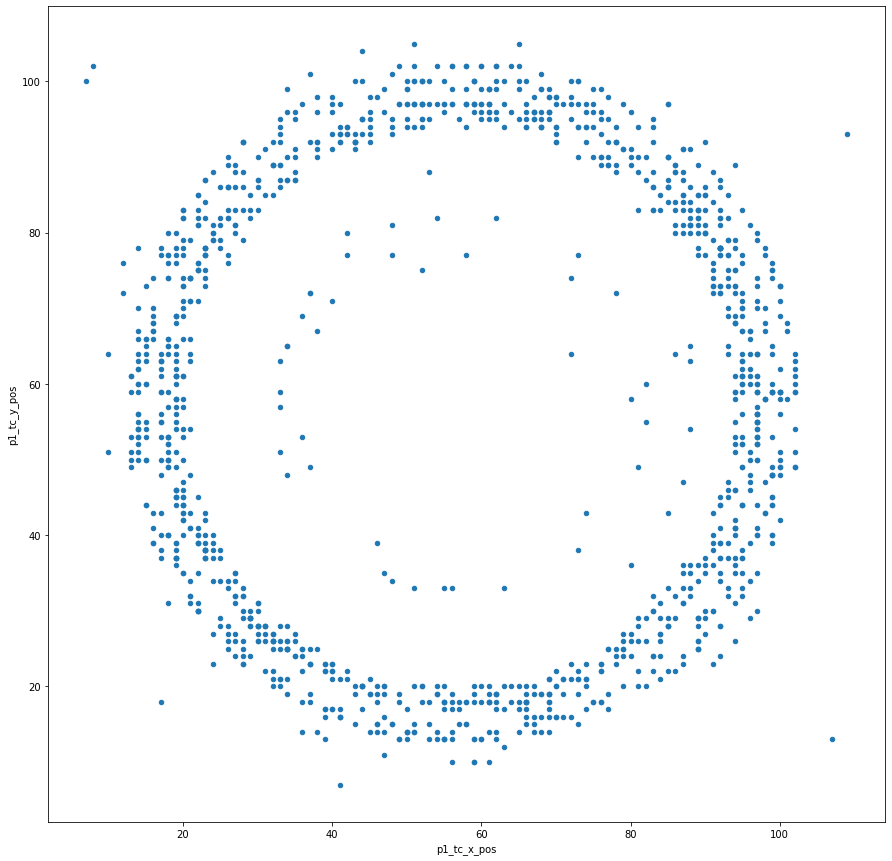

In [18]:
matches_df.plot.scatter(x="p1_tc_x_pos", y ="p1_tc_y_pos", figsize = (15,15))

In [19]:
tc_pos_df = matches_df

In [50]:
#get eucledian distance to center
def get_distance(coord1: list,coord2: list):
  """returns distance between 2 2D Coordinates"""
  distance = np.linalg.norm(np.array(coord1)-np.array(coord2))
  return distance

def get_distance_to_center(coord):
  """ returns the distance between a 2D coordinate and the map center"""
  center_distance = get_distance(coord,[60,60])
  return center_distance

def norm_winner_coordinate(coordinate):
  if coordinate >= 60: 
    coordinate = 60 - (coordinate - 60)
  return coordinate

def norm_loser_coordinate(coordinate):
  if coordinate < 60: 
    coordinate = 60 + (60-coordinate)
  return coordinate

def get_quadrant(coord: list):
  """ returns the map quandrant in which a coordinate is 1: top left, 2: top right, 3: bottom left, 4: bottom right"""
  if coord[1] >= 60:
    if coord[0] < 60:
      quadrant =  1
    else:
      quadrant = 2
  else:
    if coord[0] < 60:
      quadrant =  3
    else:
      quadrant = 4

  return quadrant

In [51]:
print(norm_winner_coordinate(59))

59


In [53]:
tc_pos_normed = {}

for index, row in tc_pos_df.iterrows():
  tc_pos_normed[index] = {}

  tc_pos_normed[index]['game_id'] = row['match_id']
  tc_pos_normed[index]['winner'] = row['winner']
  
  #split in winner and loser
  if row['winner'] == 1:
    winner_x_pos = row['p1_tc_x_pos']
    winner_y_pos = row['p1_tc_y_pos']
    loser_x_pos = row['p2_tc_x_pos']
    loser_y_pos = row['p2_tc_y_pos']
  else:
    winner_x_pos = row['p2_tc_x_pos']
    winner_y_pos = row['p2_tc_y_pos']
    loser_x_pos = row['p1_tc_x_pos']
    loser_y_pos = row['p1_tc_y_pos']

  #save orginial position
  tc_pos_normed[index]['w_tc_quadrant'] = get_quadrant([winner_x_pos,winner_y_pos])
  tc_pos_normed[index]['l_tc_quadrant'] = get_quadrant([loser_x_pos,loser_y_pos])

  #2d normalize coordinates
  tc_pos_normed[index]['w_tc_x_pos'] = norm_winner_coordinate(winner_x_pos)
  tc_pos_normed[index]['w_tc_y_pos'] = norm_winner_coordinate(winner_y_pos)
  tc_pos_normed[index]['l_tc_x_pos'] = norm_loser_coordinate(loser_x_pos)
  tc_pos_normed[index]['l_tc_y_pos'] = norm_loser_coordinate(loser_y_pos)

  tc_pos_normed[index]['wo_tc_x_pos'] = winner_x_pos
  tc_pos_normed[index]['wo_tc_y_pos'] = winner_y_pos
  tc_pos_normed[index]['lo_tc_x_pos'] = loser_x_pos
  tc_pos_normed[index]['lo_tc_y_pos'] = loser_y_pos
  
  #calc center distances and round to int
  tc_pos_normed[index]['w_tc_center_dist'] = -int(get_distance_to_center([tc_pos_normed[index]['w_tc_x_pos'],tc_pos_normed[index]['w_tc_y_pos']]))
  tc_pos_normed[index]['l_tc_center_dist'] = int(get_distance_to_center([tc_pos_normed[index]['l_tc_x_pos'],tc_pos_normed[index]['l_tc_y_pos']]))


tc_pos_normed_df = pd.DataFrame.from_dict(tc_pos_normed,orient="index")

In [54]:
tc_pos_normed_df.head()
#norm 2d focus on center and plot to see if distance plot makes sense
#then norm 1 d with distance to center via function -> heatmap 

,game_id,winner,w_tc_quadrant,l_tc_quadrant,w_tc_x_pos,w_tc_y_pos,l_tc_x_pos,l_tc_y_pos,wo_tc_x_pos,wo_tc_y_pos,lo_tc_x_pos,lo_tc_y_pos,w_tc_center_dist,l_tc_center_dist
0,125537954,2,1,3,27,25,64,110,27,95,56,10,-48,50
1,125512678,2,2,1,20,55,105,60,100,65,15,60,-40,45
2,125508148,1,1,3,58,23,79,99,58,97,41,21,-37,43
3,125508135,1,4,1,21,44,84,94,99,44,36,94,-42,41
4,125504542,1,3,2,19,37,90,84,19,37,90,84,-47,38


In [55]:
tc_pos_normed_df.describe()

,game_id,winner,w_tc_quadrant,l_tc_quadrant,w_tc_x_pos,w_tc_y_pos,l_tc_x_pos,l_tc_y_pos,wo_tc_x_pos,wo_tc_y_pos,lo_tc_x_pos,lo_tc_y_pos,w_tc_center_dist,l_tc_center_dist
count,1.299000e+03,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,1.185873e+08,1.535797,2.449577,2.554273,33.787529,34.559661,85.907621,86.101617,56.112394,58.622787,57.741339,55.488838,-40.257121,40.358737
std,5.180361e+06,0.498909,1.107979,1.103616,13.168967,13.149435,12.750870,13.164205,29.084696,28.613265,28.795853,28.892028,5.076618,5.091673
min,1.083439e+08,1.000000,1.000000,1.000000,7.000000,7.000000,60.000000,60.000000,7.000000,7.000000,8.000000,7.000000,-66.000000,17.000000
25%,1.146390e+08,1.000000,1.000000,2.000000,23.000000,23.000000,76.000000,76.000000,28.000000,30.500000,30.000000,26.500000,-43.000000,37.000000
50%,1.194469e+08,2.000000,2.000000,3.000000,31.000000,32.000000,88.000000,88.000000,55.000000,60.000000,57.000000,55.000000,-41.000000,41.000000
75%,1.232323e+08,2.000000,3.000000,3.500000,45.000000,46.000000,97.000000,97.000000,85.000000,86.000000,87.000000,83.000000,-37.000000,43.000000
max,1.255380e+08,2.000000,4.000000,4.000000,60.000000,60.000000,112.000000,113.000000,105.000000,105.000000,109.000000,109.000000,-12.000000,66.000000


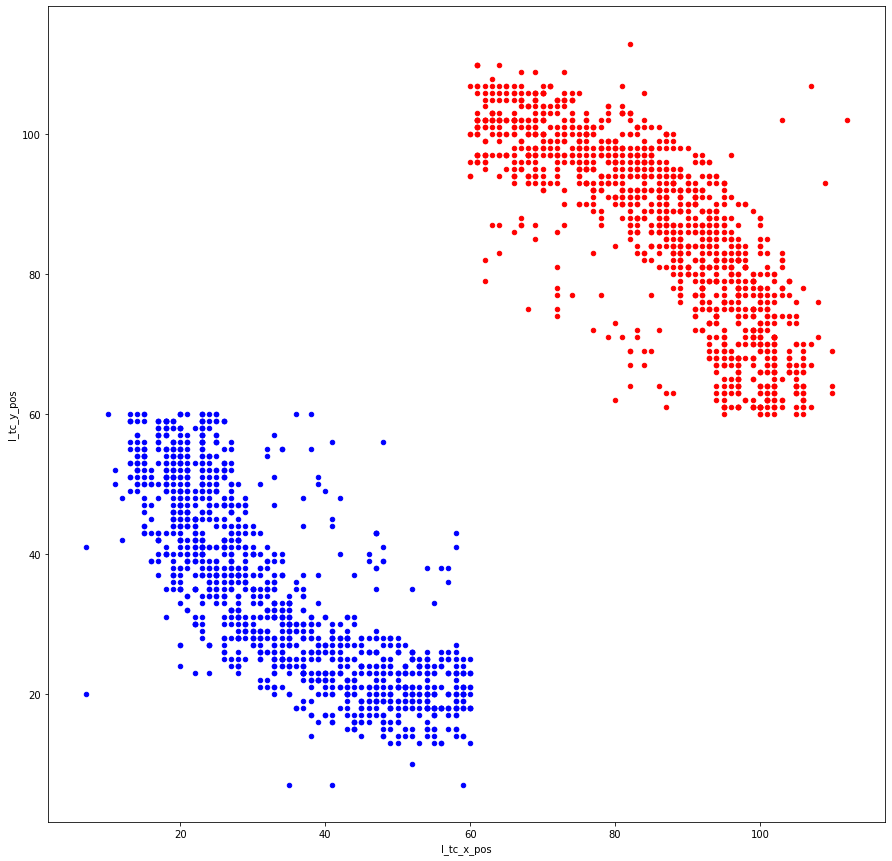

In [56]:

ax = tc_pos_normed_df.plot.scatter(x="w_tc_x_pos", y ="w_tc_y_pos",c="blue", figsize = (15,15))
tc_pos_normed_df.plot.scatter(x="l_tc_x_pos", y ="l_tc_y_pos",c="red", figsize = (15,15), ax = ax)



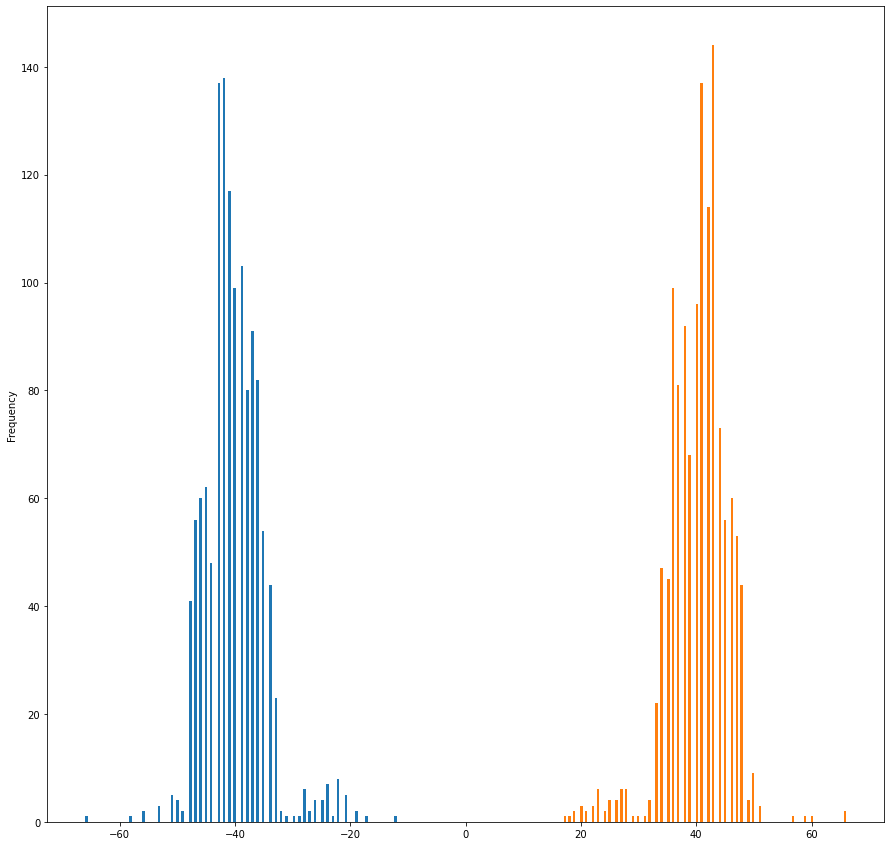

In [57]:

ax = tc_pos_normed_df["w_tc_center_dist"].plot.hist(bins = 120, figsize = (15,15))
tc_pos_normed_df["l_tc_center_dist"].plot.hist(bins = 120, figsize = (15,15),ax = ax)

